In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import motrack
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
motrack.track_motion("videos/N2070_1_day7_1mth.m4v")

No components detected, end of tracking


In [10]:
import os
fp = "videos/N2070_1_day7_1mth.m4v"
ext = ".dat"
(path, _) = os.path.splitext(fp)
(head, tail) = os.path.split(path)
os.path.normpath(head) + "\\init" + ext
tail

'N2070_1_day7_1mth'

Goal - run the script on a folder of videos and obtain traveled distances and times as an output.
Pseudocode:
    Run code and for:
        i == 1, save both init and corresponding dat with repeatability information. Save output data
            save_init = true, reinitalize_iii = True
        i > 1, load roi_hist +  background from init and save pts + frame_pos to file name 
            accordingly. Save output data
            save_init = false, reinitialize_roi = True
        
        
    
    


In [ ]:
!python motrack.py -v "videos/N2070_1_day7_1mth.m4v"

In [211]:
pts = np.array([[1259,  520],
               [1259,  626],
               [1434,  626],
               [1434,  520]], dtype = np.int32)
frame = cv2.imread('videos/frame.png')
background, mask_fgd = motrack.segment_background(frame, pts)

In [127]:
frame = motrack.subtract_background(frame, background, [])

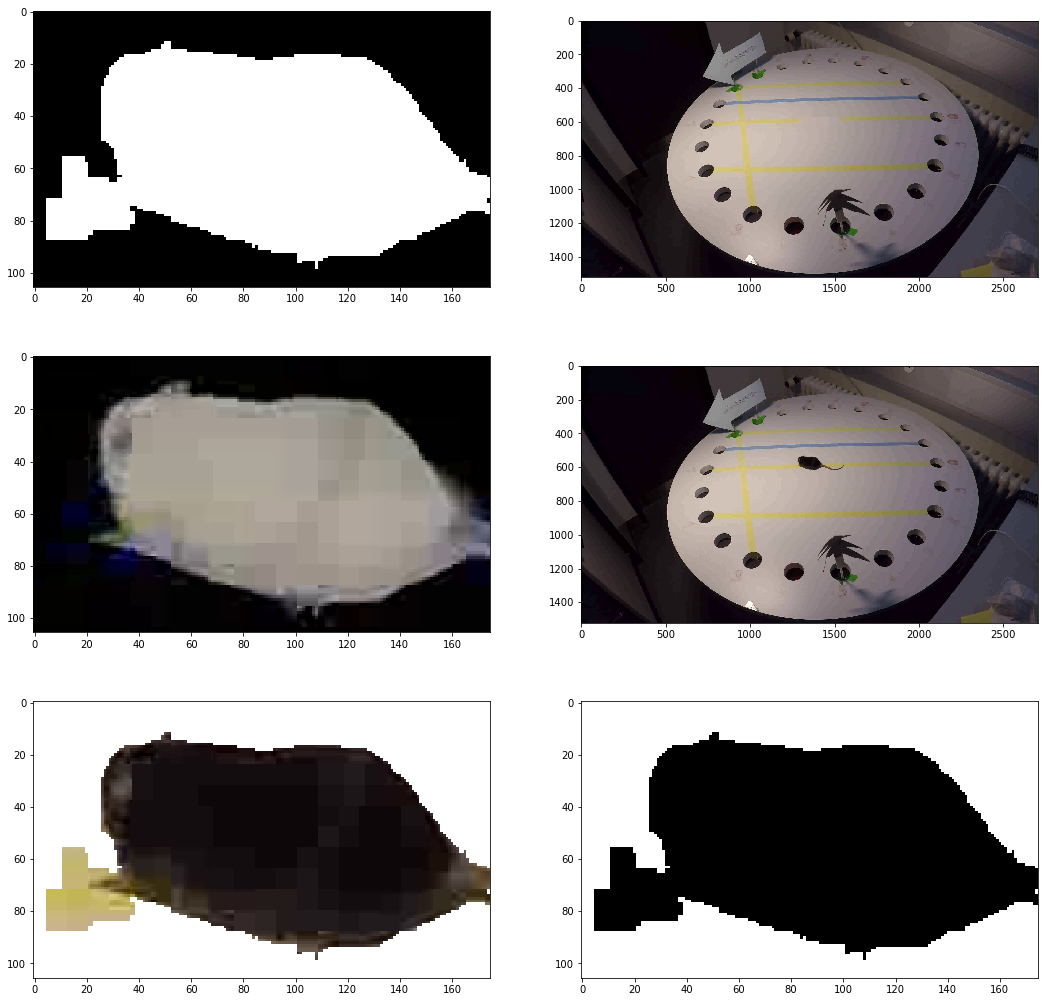

In [238]:
mask_bgd = np.invert(mask_fgd, dtype = np.uint8)
frame_sub1 = cv2.subtract(background, frame, mask = mask_bgd)

#frame_sub2 = cv2.bitwise_and(frame, background, mask = mask_bgd)
#frame_sub2[mask_fgd == 0] = np.abs(background - frame)[mask_fgd == 0]

frame_sub3 = frame.copy()
frame_sub3[mask_fgd == 0,:] = np.ones_like(frame,dtype=np.uint8)[mask_fgd == 0,:]*255

#frame_sub = cv2.absdiff(background, frame)
#frame_sub = cv2.cvtColor(frame_sub, cv2.COLOR_BGR2GRAY)
#frame_sub = frame_sub > 0
# cv2.normalize(  frame_sub1, frame_sub1,
#                  alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX,
#                  dtype=cv2.CV_8U)

fig, ax = plt.subplots(3, 2, figsize = (18, 18))

ax[0,0].imshow(mask_fgd[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1]],cmap="gray")
ax[0,1].imshow(background,cmap="gray")
ax[1,0].imshow(frame_sub1[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1],:],cmap="gray")
ax[1,1].imshow(frame,cmap="gray")
ax[2,0].imshow(frame_sub3[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1],:],cmap="gray")
ax[2,1].imshow(mask_bgd[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1]],cmap="gray")
plt.show()

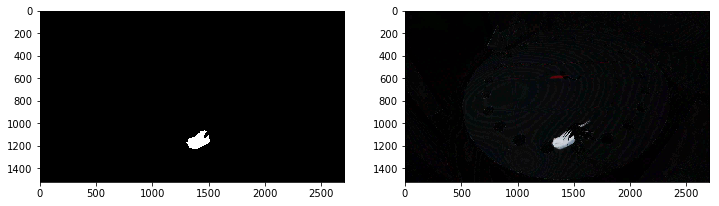

(1520, 2704)

In [12]:
params = dict(  kSize_gauss = (3,3), sigmaX = 1,
                        kSize_canny = (5,5))
frame_avg = cv2.imread('videos/frame_avg1.png')
prob_mask = cv2.imread('videos/prob_mask1.png')

(prob_mask, vis_image) = motrack.check_min_area(prob_mask, frame_avg, **params )

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(vis_image, cmap = 'bone')
ax2.imshow(frame_avg, cmap = 'bone')
plt.show()
vis_image.shape

In [74]:
stuff = motrack.initialize_tracking("videos/N2070_1_day7_1mth.m4v", True, True)

In [60]:
pts = np.array([[1259,  520],
               [1259,  626],
               [1434,  626],
               [1434,  520]], dtype = np.int32)


In [61]:
pts

array([[1009,  770],
       [1009,  876],
       [1184,  876],
       [1184,  770]])

#### Next you need to:
    - Make the search more robust (try different hardcoded values, some more filtering, ...)
    - Have one function for the same part of algorithm, but pass different flags to have different aproaches

    Code graveyrard, to be deleted once things are working:
    